In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
class KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None
        
    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[indices]
    
    def compute_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        return distances
    
    def assign_clusters(self, distances):
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, X, labels):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        
        for _ in range(self.max_iter):
            distances = self.compute_distances(X, self.centroids)
            
            self.labels = self.assign_clusters(distances)
            
            new_centroids = self.update_centroids(X, self.labels)
            
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
            
        return self
    
    def predict(self, X):
        distances = self.compute_distances(X, self.centroids)
        return self.assign_clusters(distances)

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kmeans = KMeans(k=3, max_iter=100)
kmeans.fit(X_train)

test_labels = kmeans.predict(X_test)

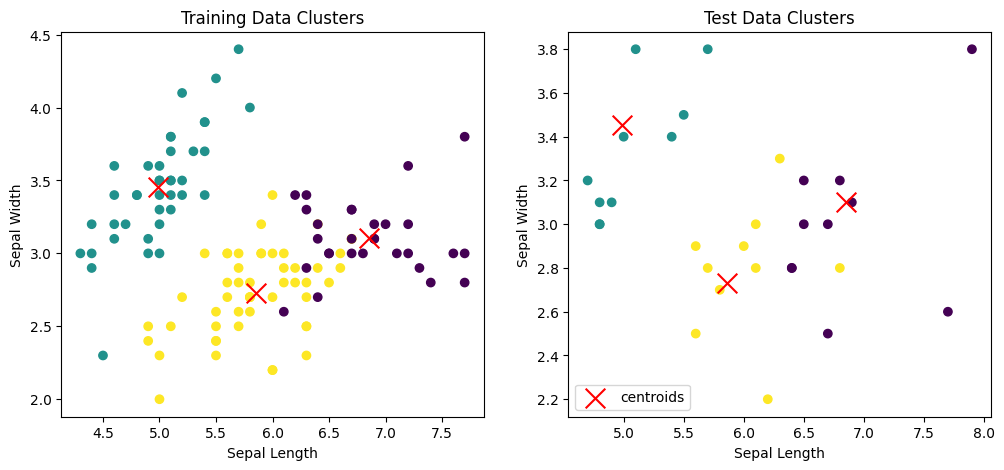

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200)
plt.title('Training Data Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label= "centroids")
plt.title('Test Data Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()